# Linear Regression with scikit-learn

This section creates and measures a linear regression model using sklearn.

* Method: Ordinary Least Squares
* Dataset: Sample Stocks
* Models correlate the relation between dividends and returns


In [1]:
#Import Dependencies
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_FILE = "../data/sample_stocks.csv"

In [3]:
# Import the data
stock_data = pd.read_csv(DATA_FILE)
stock_data.head(5)

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


In [4]:
# Check the data types
stock_data.dtypes

returns            int64
dividendyield    float64
dtype: object

# Fit a Linear Regression Model

In [5]:
# Create the X and y
X = stock_data[['dividendyield']]
y = stock_data[['returns']]

In [6]:
# Create a linear regression model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Split the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, y, test_size=0.33, random_state=5)

In [8]:
# Fit (train) the model with the training data
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Intercept Coefficient: represents the mean change in the response variable for one unit of change in the predictor variable while holding everything else constant. It isolates the role of one variable from all others.

In [9]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: [-16.20177719]


In [10]:
# Number of coefficients: 
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 1


Note: the correlation coefficients (below) give an idea of the strength of the relationship between two variables.

In [11]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
fc_df

,features,coefficients
0,dividendyield,[11.03654795915266]


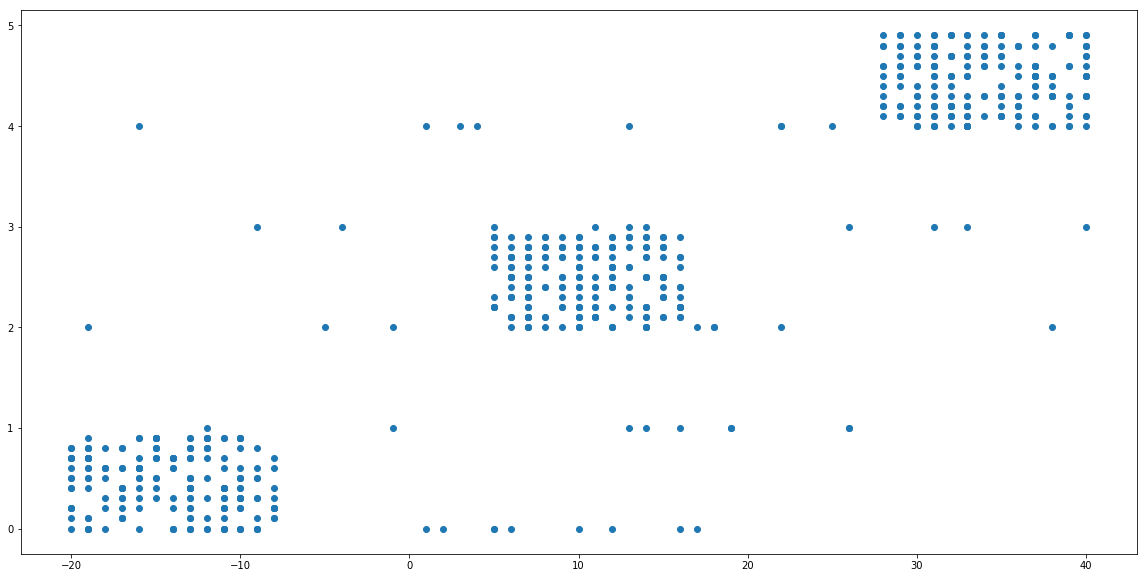

In [12]:
# Create a plot 
fig = plt.figure(figsize=(20,10))
plt.scatter(stock_data.returns, stock_data.dividendyield)
# plt.xlabel("Average number of rooms per dwelling (RM)")
# plt.ylabel("Housing Price")
# plt.title("Relationship between RM and Price")
plt.show()

In [13]:
# Use the test data to create predictions and show the first 5
y_pred = lm.predict(X_test)
y_pred[0:5]

array([[-9.57984842],
       [-8.47619362],
       [12.4932475 ],
       [12.4932475 ],
       [36.77365301]])

In [14]:
print(f"Training Data Score: {lm.score(X_train, Y_train)}")
print(f"Testing Data Score: {lm.score(X_test, Y_test)}")

Training Data Score: 0.8587392659897544
Testing Data Score: 0.8517382382213221


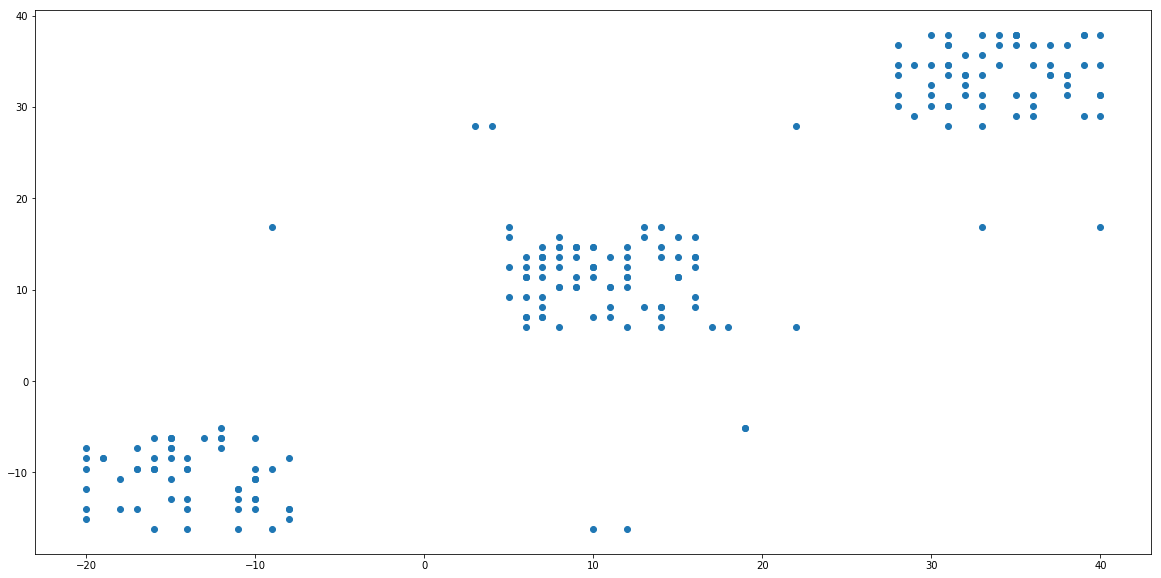

In [15]:
# Create a plot to compare actual returns (Y_test) and the predicted returns (pred_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y_test, y_pred)
# plt.xlabel("Actual Prices: $Y_i$")
# plt.ylabel("Predicted Prices: $\hat{Y}_i$")
# plt.title("Actual vs. Predicted Prices: $Y_i$ vs. $\hat{Y}_i$")
plt.show()

## Model Evaluation

### Mean Squared Error

* A measure of the average magnitude of the errors without consideration for their direction; measures accuracy for continuous variables.
* Always non-negative
* Values closer to zero (0) are better

In [16]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, lm.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 56.001887889619276


In [17]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(Y_test, lm.predict(X_test))))

MSE Test Data: 52.0133831825866


### Variance (R^2)

* Explains how much of the variability of a factor can be caused or explained by its relationship to another factor; how well the model is predicting.
* A score of 1 means a perfect prediction
* A score of 0 means the model always predicts the expected value of y, disregarding the input features

In [18]:
print("Variance Score: %.2f" % r2_score(Y_test, y_pred))

Variance Score: 0.85


### Residual Plot

**Residuals**: the difference between the predictions and the actuals.


**Interpretation**: If the model is working well then the data should be randomly scattered around line zero. If there is structure in the data, that means the model is not capturing something, perhaps interaction between two variables or it's time dependent. Check the parameters of your model.

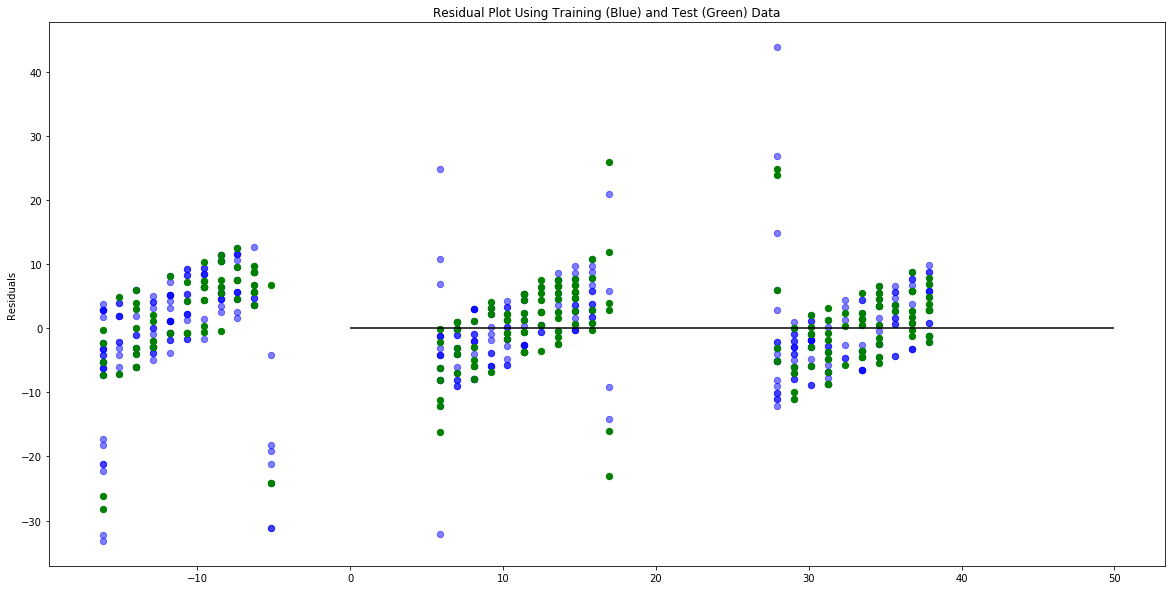

In [19]:
# Create a residual plot
fig = plt.figure(figsize=(20,10))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel("Residuals")
plt.title("Residual Plot Using Training (Blue) and Test (Green) Data")
plt.show()

## Logistic Regression with Sklearn

This section creates and measures a logistic regression model with sklearn.

* Method: [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred = lr.predict(X_test)

In [24]:
print(f"Training Data Score: {lm.score(X_train, y_train)}")
print(f"Testing Data Score: {lm.score(X_test, y_test)}")

Training Data Score: 0.8715884818229944
Testing Data Score: 0.8218798017870801


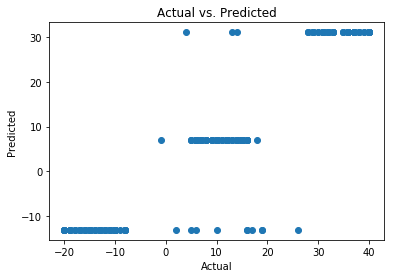

In [25]:
# Create a plot to compare actual labels (Y_test) and the predicted labels (predictions)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

In [26]:
print("Accuracy Score: %.2f" % accuracy_score(y_test, y_pred))

Accuracy Score: 0.10


In [27]:
# Get scores for 5 folds over the data
clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.10377358 0.125      0.14942529 0.09090909 0.13235294]


C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         -20       0.00      0.00      0.00         6
         -19       0.00      0.00      0.00         5
         -18       0.00      0.00      0.00         3
         -17       0.00      0.00      0.00         5
         -16       0.00      0.00      0.00         5
         -15       0.00      0.00      0.00         7
         -14       0.00      0.00      0.00         4
         -13       0.09      1.00      0.17         7
         -12       0.00      0.00      0.00         5
         -11       0.00      0.00      0.00         6
         -10       0.00      0.00      0.00         8
          -9       0.00      0.00      0.00         1
          -8       0.00      0.00      0.00         5
          -1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.00    

C:\Users\andre\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Lasso Regression with scikit-learn

This section creates and measures a LASSO regression model using sklearn.


In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline
    

In [30]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Create an instance of a Lasso Regression model
model = Lasso(alpha=0.3, normalize=True)
model.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(model.intercept_))

Estimated intercept coefficient: [-7.63223054]


In [34]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['features', 'coefficients'])
fc_df.head()

,features,coefficients
0,dividendyield,7.394199


In [35]:
len(fc_df)

1

In [36]:
y_pred = model.predict(X_test)

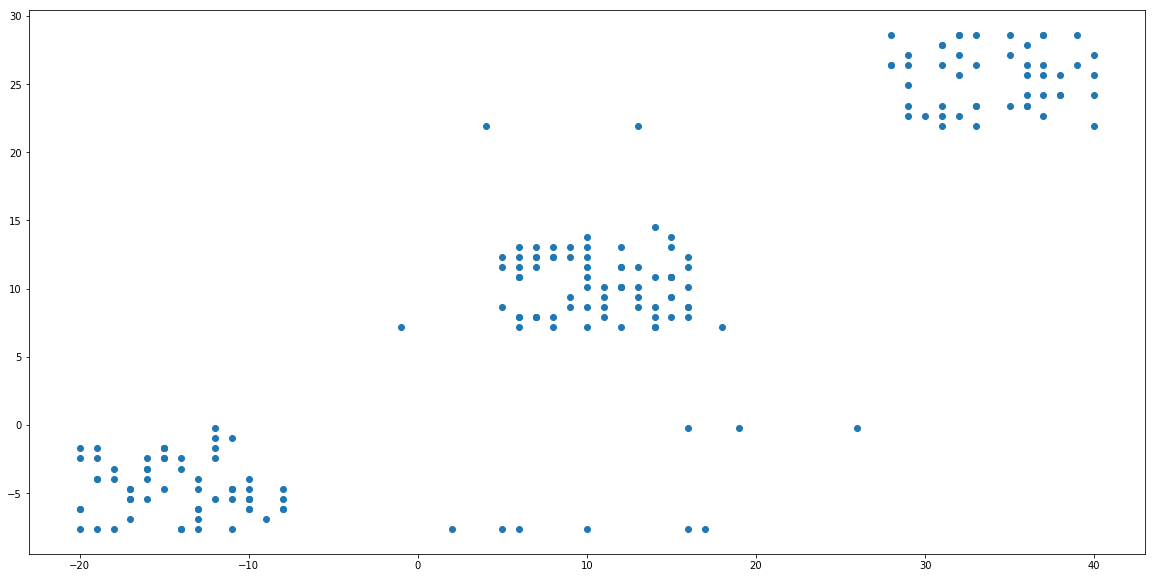

In [37]:
# Create a plot to compare actual sales (Y_test) and the predicted sales (pred_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred)
# plt.xlabel("Actual Sales: $Y_i$")
# plt.ylabel("Predicted Sales: $\hat{Y}_i$")
# plt.title("Actual vs. Predicted Sales: $Y_i$ vs. $\hat{Y}_i$")
plt.show()

In [39]:
print(f"Training Data Score: {lm.score(X_train, y_train)}")
print(f"Testing Data Score: {lm.score(X_test, y_test)}")

Training Data Score: 0.8684119017766194
Testing Data Score: 0.823926798537665


In [ ]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(y_train, model.predict(X_train))
print("MSE Training Data: {}".format(mse))

In [ ]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(y_test, model.predict(X_test))))

In [ ]:
print("Variance Score: %.2f" % r2_score(y_test, y_pred))

In [ ]:
# # Create a residual plot
# fig = plt.figure(figsize=(20,10))
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=40)
# plt.hlines(y=0, xmin=0, xmax=50)
# # plt.ylabel("Residuals")
# # plt.title("Residual Plot Using Training (Blue) and Test (Green) Data")
# plt.show()